### #1 숫자 특성 조정

In [2]:
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import linear_model
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
%load_ext autoreload
%autoreload 2

np.set_printoptions(precision=5, suppress=True)

In [3]:
from sklearn.datasets import fetch_openml

boston= fetch_openml(name="boston", version=1, parser='auto')
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset['target'] = boston.target
dataset['CHAS']=dataset['CHAS'].astype('float64')
dataset['RAD']=dataset['RAD'].astype('float64')
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
observations = len(dataset)
variables = dataset.columns[:-1]
X = dataset.iloc[:, :-1]
y = dataset['target'].values

In [6]:
# 로지스틱 테스트 >> 수준 "1"에서 점수 25 이상의 모든 값에 대해 목표변수를 이진 응답으로 변환
yq = np.array(y > 25, dtype=int)

### 평균 중심화
- 데이터 전처리 >> scikit-learn 패키지의 preprocessing 모듈 사용(StandardScalar / MinMaxScalar)
- StandardScalar >> 중심화 작업(평균 0, 데이터 일관성 유지)
- MinMaxScalar >> 새로운 최대최소범위 지정

In [7]:
linear_regression = linear_model.LinearRegression(fit_intercept=True)

In [8]:
linear_regression.fit(X, y)

LinearRegression()

In [9]:
print("coefficeints: {}\n intercept: {}".format(linear_regression.coef_, linear_regression.intercept_))

coefficeints: [ -0.10801   0.04642   0.02056   2.68673 -17.76661   3.80987   0.00069
  -1.47557   0.30605  -0.01233  -0.95275   0.00931  -0.52476]
 intercept: 36.45948838509025


In [10]:
dataset.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
target       5.00000
dtype: float64

In [11]:
# 중심화 이후 선형회귀 >> 절편의 값이 목표변수의 평균값으로 출력
centering = StandardScaler(with_mean=True, with_std=False)
linear_regression.fit(centering.fit_transform(X), y)
print("coefficeints: {}\nintercetp: {}".format(linear_regression.coef_, linear_regression.intercept_))

coefficeints: [ -0.10801   0.04642   0.02056   2.68673 -17.76661   3.80987   0.00069
  -1.47557   0.30605  -0.01233  -0.95275   0.00931  -0.52476]
intercetp: 22.532806324110677


### 표준화

In [12]:
# 기존 정규화 과정에서 with_std = TRUE로 설정 >> 각각의 계수를 예측변수(X)의 표준편차에 해당하는 만큼의 수정 후 목표(Y)의 단위 변화
standardization = StandardScaler(with_mean=True, with_std=True)
linear_regression.fit(standardization.fit_transform(X), y)
print("coefficeints: {}\nintercetp: {}".format(linear_regression.coef_, linear_regression.intercept_))

coefficeints: [-0.92815  1.08157  0.1409   0.68174 -2.05672  2.67423  0.01947 -3.10404
  2.66222 -2.07678 -2.06061  0.84927 -3.74363]
intercetp: 22.532806324110677


### 정규화

In [13]:
# 예측변수의 범위를 0~1로 적용
scaling = MinMaxScaler(feature_range=(0, 1))
linear_regression.fit(scaling.fit_transform(X), y)
print("coefficeints: {}\nintercetp: {}".format(linear_regression.coef_, linear_regression.intercept_))

coefficeints: [ -9.60976   4.64205   0.56084   2.68673  -8.63457  19.88369   0.06722
 -16.22666   7.03914  -6.46333  -8.95582   3.69283 -19.01724]
intercetp: 26.62026758468779


### 로지스틱회귀 사례

In [14]:
Xq = sm.add_constant(standardization.fit_transform(X))   # 데이터 X 표준화 후 상수항 추가
logit = sm.Logit(yq, Xq)      # 로지스틱 회귀 모델 정의
result = logit.fit()          # 모델 학습(최적의 파라미터(회귀 계수) 탐)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.206631
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  506
Model:                          Logit   Df Residuals:                      492
Method:                           MLE   Df Model:                           13
Date:                Mon, 07 Oct 2024   Pseudo R-squ.:                  0.6289
Time:                        20:06:08   Log-Likelihood:                -104.56
converged:                       True   LL-Null:                       -281.76
Covariance Type:            nonrobust   LLR p-value:                 9.145e-68
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0542      0.356     -8.571      0.000      -3.753      -2.356
x1            -0.0954      0.

##### 동일한 스케일로 계수 해석 & 모든 예측변수가 평균값을 가질 때 절편을 응답으로 간주

In [15]:
# 시그모이드 변환을 통해 계수를 확률로 변환
def sigmoid(p):
    return 1 / (1 + np.exp(-p))
print('intercept: {:.3f}'.format(result.params[0]))
print('probability of value above 25 when all predictors are average: {:.3f}'.format(sigmoid(result.params[0])))

intercept: -3.054
probability of value above 25 when all predictors are average: 0.045


##### 절편을 시그모이드 함수에 통과시켜 해당 절편에서의 확률을 계산 / 모든 독립 변수가 평균일 때, 해당 값이 25를 초과할 확률을 의미

In [16]:
print('average likelihood of positive response: {:.3f}'.format(sum(yq) / float(len(yq))))

average likelihood of positive response: 0.245


In [17]:
# 독립변수가 상수만 있는 경우의 로지스틱 회귀 모델(모든 입력을 동일하게 설정)
C = np.ones(len(X))            # X의 길이와 동일한 크기의 배열 생성 >> 상수항만 있는 로지스틱 회귀 모델
logit = sm.Logit(yq, C)
result = logit.fit()
print(result.summary())

# 모델의 절편을 시그모이드 함수에 통과시켜 해당 절편에서의 확률 계산 (모든 입력이 동일하게 설정될 때 예측값)
print('\nprobability of alue above 25 using just a constant: {:.3f}'.format(sigmoid(result.params[0])))

Optimization terminated successfully.
         Current function value: 0.556842
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  506
Model:                          Logit   Df Residuals:                      505
Method:                           MLE   Df Model:                            0
Date:                Mon, 07 Oct 2024   Pseudo R-squ.:               3.276e-11
Time:                        20:06:17   Log-Likelihood:                -281.76
converged:                       True   LL-Null:                       -281.76
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1251      0.103    -10.886      0.000      -1.328      -0.923

probability of alue above 25

### #2 정성적 특성 인코딩(개방적 질문 / 서술형?)

In [18]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

In [19]:
# 기상 정보를 통해 테니스를 칠 수 있는 조건 설명
# 정성적 데이터 생성

outlook = ['sunny', 'overcat', 'rainy']
temperature = ['hot', 'mild', 'cool']
humidity = ['high', 'normal']
windy = ['TRUE', 'FALSE']

weather_dataset = list()

for o in outlook:
    for t in temperature:
        for h in humidity:
            for w in windy:
                weather_dataset.append([o, t, h, w])

# TRUE(1), FALSE(0): 이진변수(더미변수) >> 정성적 정보를 숫자(BOOL)의 형태로 라벨링
play = [0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 
        1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 
        0, 0, 0, 1]

In [20]:
len(play)

36

### PANDAS를 이용한 더미 코딩
- 모든 데이터를 데이터프레임으로 변환
- get_dummies()를 사용해 전체 데이터프레임에 대한 더미변수 변환 가능(특정 열 지정도 가능)

In [21]:
df = pd.DataFrame(weather_dataset, columns=['outlook', 'temperature', 'humidity', 'windy'])

In [22]:
# get_dummies() 사용 시 object 형태의 T/F로 변환될 수 있으니 dtype=int 설정 필요
pd.get_dummies(df.humidity, dtype = int).loc[:5, :]

,high,normal
0,1,0
1,1,0
2,0,1
3,0,1
4,1,0
5,1,0


In [22]:
dummy_encoding = pd.get_dummies(df, dtype = int)
dummy_encoding

,outlook_overcat,outlook_rainy,outlook_sunny,temperature_cool,temperature_hot,temperature_mild,humidity_high,humidity_normal,windy_FALSE,windy_TRUE
0,0,0,1,0,1,0,1,0,0,1
1,0,0,1,0,1,0,1,0,1,0
2,0,0,1,0,1,0,0,1,0,1
3,0,0,1,0,1,0,0,1,1,0
4,0,0,1,0,0,1,1,0,0,1
5,0,0,1,0,0,1,1,0,1,0
6,0,0,1,0,0,1,0,1,0,1
7,0,0,1,0,0,1,0,1,1,0
8,0,0,1,1,0,0,1,0,0,1
9,0,0,1,1,0,0,1,0,1,0


In [23]:
X = sm.add_constant(dummy_encoding)
logit = sm.Logit(play, X)
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.292346
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   36
Model:                          Logit   Df Residuals:                       29
Method:                           MLE   Df Model:                            6
Date:                Fri, 04 Oct 2024   Pseudo R-squ.:                  0.5744
Time:                        15:34:24   Log-Likelihood:                -10.524
converged:                       True   LL-Null:                       -24.731
Covariance Type:            nonrobust   LLR p-value:                 7.856e-05
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2393        nan        nan        nan         nan         nan
outlook_overcat      2.9833   5.11e+07   5.83e-08      1.000      -1e+08       1e+08
outlook_rainy       -2.1746   5.46e+07  -3.98e-08      1.000   -1.07e+08    1.07e+08
outlook_sunny       -0.5695   5.18e+07   -1.1e-08      1.000   -1.02e+08    1.02e+08
temperature_cool    -2.1996        nan        nan        nan         nan         nan
temperature_hot      0.3045        nan        nan        nan         nan         nan
temperature_mild     2.1344        nan        nan        nan         nan         nan
humidity_high       -2.0459        nan        nan        nan         nan         nan
humidity_normal      2.2851        nan        nan        nan         nan         nan
windy_FALSE          1.3162        nan        nan        nan         nan         nan
windy_TRUE          -1.0770        nan        nan        nan         nan         nan
====================================================================================
"""

In [24]:
X.drop(['outlook_sunny', 'temperature_mild', 'humidity_normal', 'windy_FALSE'], inplace=True, axis=1)
# inplace=True >> 기존 데이터프레임에 변경 사항 즉시 적용
# axis = 1 >> 열 제거(0일 경우 행 제거)

In [25]:
logit = sm.Logit(play, X)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.292346
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   36
Model:                          Logit   Df Residuals:                       29
Method:                           MLE   Df Model:                            6
Date:                Fri, 04 Oct 2024   Pseudo R-squ.:                  0.5744
Time:                        15:34:29   Log-Likelihood:                -10.524
converged:                       True   LL-Null:                       -24.731
Covariance Type:            nonrobust   LLR p-value:                 7.856e-05
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.4055      2.196      2.462      0.014       1.102       9.709
outlook_ove

### DictVectorizer
- 사전 목록으로 구성된 데이터셋 사용
- 문자열 데이터 >> 이진변수로 변환 / 숫자 데이터 >> 변경 x
- 이미 숫자 데이터로 코딩 >> 사전에 문자열로 변환해놔야 함

In [26]:
vectorizer = DictVectorizer(sparse = False)                        # 사전 데이터 >> 피처 벡터 변환(SPARSE로 일반적인 배열 형식)
dict_representation = [{varname:var for var, varname in zip(
    row,                                                           
    ['outlook', 'temperature', 'humidity', 'windy']
)} for row in weather_dataset]
print(dict_representation[0])
print(vectorizer.fit_transform(dict_representation))               # 딕셔너리 리스트 학습 후 벡터 형태로 변환

{'outlook': 'sunny', 'temperature': 'hot', 'humidity': 'high', 'windy': 'TRUE'}
[[1. 0. 0. 0. 1. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 0. 0. 1. 0. 0. 1. 0. 1.]
 [1. 0. 0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 1. 0. 0. 1. 0. 1.]
 [0. 1. 0. 0. 1. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 1. 1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1. 1. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 1. 0. 0. 1. 0.]
 [1. 0. 1. 0. 0. 0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0. 0. 1. 0. 1. 0.]
 [0. 1. 1. 0. 0. 0. 1. 0. 0. 1.]
 [0. 1. 1. 0. 0. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 0. 0. 0. 1. 0. 1.]
 [1. 0. 1. 0. 0. 0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0. 0. 0. 1. 0. 1.]
 [0. 1. 1. 0. 0. 0. 0. 1. 1. 0.]
 [1. 0. 1. 0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0. 1. 0. 0. 1. 0.]
 [0. 1. 1. 0. 0. 1. 0. 0. 0. 1.]
 [0. 1. 1. 0. 0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0. 1. 0. 1. 

In [27]:
print(vectorizer.feature_names_)   # 변환 시각화

['humidity=high', 'humidity=normal', 'outlook=overcat', 'outlook=rainy', 'outlook=sunny', 'temperature=cool', 'temperature=hot', 'temperature=mild', 'windy=FALSE', 'windy=TRUE']


In [28]:
# LabelEncoder() - 라벨 >> 숫자 변환
label_encoder = LabelEncoder()
label_encoder.fit_transform(df.outlook)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [29]:
# inverse_transform - 할당 숫자는 리스트의 라벨 위치에 의해 제공
label_encoder.inverse_transform([0, 1, 2])

array(['overcat', 'rainy', 'sunny'], dtype=object)

In [30]:
label_encoder.classes_

array(['overcat', 'rainy', 'sunny'], dtype=object)

In [31]:
# LabelBinarizer() - 숫자 >> 더미변수 변환
label_binarizer = LabelBinarizer()
label_binarizer.fit_transform(label_encoder.fit_transform(df.outlook))

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]])

### 특성 해셔 >>> One-hot 인코딩

In [32]:
# 텍스트의 선형회귀
# enumerate() - 단어와 인덱스를 쌍으로 묶어 반환
your_text = 'Nomina sunt consequentia rerum'
mapping_words_in_text = {word:position for position, word in enumerate(set(your_text.lower().split(' ')))}
mapping_words_in_text      # 단어를 키, 인덱스를 값으로 하는 딕셔너리 생성

{'consequentia': 0, 'nomina': 1, 'sunt': 2, 'rerum': 3}

In [33]:
corpus = [
    'The quick for jumped over the lazy dog',
    'I sought a dog wondering around with a bird',
    'My dog is named Fido'
]

In [34]:
# binary=True - 단어가 존재하는 텍스트와 일치하는 단위값 집합으로 희소 행렬 반환
textual_one_hot_encoder = CountVectorizer(binary=True)

In [35]:
textual_one_hot_encoder.fit(corpus)

CountVectorizer(binary=True)

In [36]:
vectorized_text = textual_one_hot_encoder.transform(corpus)

In [37]:
vectorized_text.todense()        # 결과 행렬 시각화

matrix([[0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1],
        [0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [38]:
textual_one_hot_encoder.get_feature_names_out()

array(['around', 'bird', 'dog', 'fido', 'for', 'is', 'jumped', 'lazy',
       'my', 'named', 'over', 'quick', 'sought', 'the', 'with',
       'wondering'], dtype=object)

In [39]:
# 해셔 문제점 >> 보지 못한 텍스트 처리?
textual_one_hot_encoder.transform(['Jone went home today']).todense()

matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [40]:
# 해싱 트랙 사용 
# 1) 매우 큰 희소 벡터 정의
# 2) 해시 함수의 특정 특성을 이용해 벡터 안에 있는 각 단어의 위치 지정

hashing_trick = HashingVectorizer(n_features=11, binary=True, norm=None)    
M = hashing_trick.transform(corpus)
M.todense()

matrix([[1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.]])

In [41]:
# 해싱 트랙 특징
# 1) 단어 위치가 해싱 함수에 따라 다름 >> 새로운 텍스트의 벡터화 가능
# 2) 집중하는 값을 특정 위치에 갖는 반면 다른 위치는 공백 >> 해시 함수의 충돌 문제
hashing_trick.transform(['John is the owner of that dog']).todense()

matrix([[1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0.]])

### #3 수치 특성 변환(거리 기반 성능 향상을 위한 전제 조건)

In [42]:
from sklearn.datasets import fetch_openml

boston= fetch_openml(name="boston", version=1, parser='auto')
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset['target'] = boston.target
dataset['CHAS']=dataset['CHAS'].astype('float64')
dataset['RAD']=dataset['RAD'].astype('float64')
dataset

observations = len(dataset)
variables = dataset.columns[:-1]
X = dataset.iloc[:, :-1]
y = dataset['target'].values

In [43]:
print(boston.feature_names)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [44]:
linear_regression = linear_model.LinearRegression(fit_intercept=True)
linear_regression.fit(X, y)

LinearRegression()

In [45]:
r2_score(y, linear_regression.predict(X))

0.7406426641094095

In [46]:
# 잔차 측정 - 선형모델이 계수 및 절편의 집합으로 파악하고 예측할 수 없었던 것을 나타내는 수치 정보
# 선형회귀의 잔차 - 평균 0, 표준편차는 오차의 크기에 따라 달라짐
residuals = y - linear_regression.predict(X)
print("Head of residual %s" % residuals[:5])
print("Mean of residuals: %0.3f" % np.mean(residuals))
print("Standard deviation of residuals: %0.3f" % np.std(residuals))

Head of residual [-6.00384 -3.42556  4.1324   4.79296  8.25648]
Mean of residuals: -0.000
Standard deviation of residuals: 4.679


Text(0, 0.5, 'partial residuals')

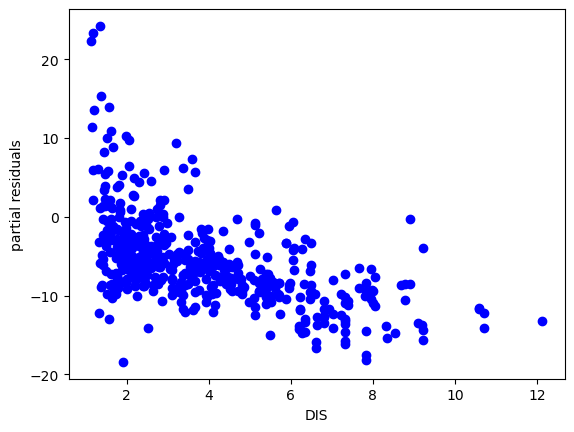

In [47]:
# 부분 잔차 플롯 생성 for 비선형성 확인
# 변수 선택 후 변숫값 * 계수 + 회귀 잔차 = 부분 잔차 >> 회귀선으로부터 변수를 추출하여 잔차에 넣음
# 부분 잔차 - 오차 & 계수 가중치 변수 포함 >> 비선형 패턴 확인

var = 7
partial_residual = residuals + X.iloc[:, var] * linear_regression.coef_[var]
plt.plot(X.iloc[:, var], partial_residual, 'bo')
plt.xlabel(boston.feature_names[var])
plt.ylabel('partial residuals')

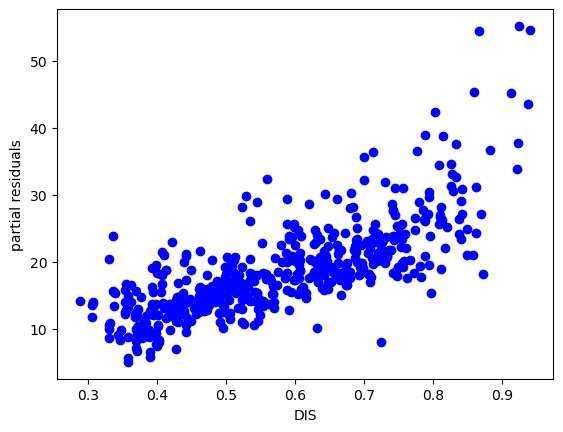

In [48]:
# 역제곱 변환 후 부분 잔차 플롯
# 더 높은 R^2값 반영 >> 모델 용량 증가 >> 비선형성 해결
X_t = X.copy()
X_t.iloc[:, var] = 1./np.sqrt(X_t.iloc[:, var])
linear_regression.fit(X_t, y)
partial_residual = residuals + X_t.iloc[:, var] * linear_regression.coef_[var]
plt.plot(X_t.iloc[:, var], partial_residual, 'bo')
plt.xlabel(boston.feature_names[var])
plt.ylabel('partial residuals')
plt.show()

In [49]:
# 비닝 방법 - 연속형 변수의 이진 변수 변환 >> 변수의 숫자 범위의 각 부분(Bin)에 대해 계수 추정
LB = LabelBinarizer()
X_t = X.copy()
edges = np.histogram(X_t.iloc[:, var], bins=20)[1]   # 값을 동일한 간격의 Bin으로 나눈 후 히스토그램을 통해 Bin의 경계 확인
binning = np.digitize(X_t.iloc[:, var], edges)       # digitize - Bin의 경계를 기반으로 값을 Bin 번호로 변환
np.column_stack(                                     
    (X_t.drop(boston.feature_names[var], axis=1), 
    LB.fit_transform(binning))                       # 모든 Bin 번호를 이진변수로 변환 - 기존 모든 변수를 새로운 이진 집합으로 교체하여 모델 적합
)
linear_regression.fit(X_t, y)
r2_score(y, linear_regression.predict(X_t))

0.7406426641094095

### 누락 데이터(결측치)

In [50]:
from sklearn.impute import SimpleImputer 

In [51]:
example = np.array([1, 2, np.nan, 4, 5])
example

array([ 1.,  2., nan,  4.,  5.])

In [52]:
np.isnan(example)    # 벡터 내에서 누락된 값이 있는 위치 탐색

array([False, False,  True, False, False])

In [53]:
np.nan_to_num(example)     # 슬라이싱 혹은 모든 nan을 0으로 교체

array([1., 2., 0., 4., 5.])

In [54]:
# 슬라이싱
missing = np.isnan(example)
replaceing_value = np.mean(example[~missing])    # ~missing >> 결측치가 아닌 값
example[missing] = replaceing_value
example

array([1., 2., 3., 4., 5.])

In [55]:
from random import sample, seed

In [56]:
# 결측치 대체
seed(19)
Xm = X.copy()
missing = sample(range(len(y)), len(y) // 4)
Xm.iloc[missing, 5] = np.nan

In [57]:
print("Header of Xm[:, 5]: {}".format(Xm.iloc[:10, 5]))    

Header of Xm[:, 5]: 0    6.575
1      NaN
2    7.185
3      NaN
4    7.147
5    6.430
6    6.012
7    6.172
8      NaN
9    6.004
Name: RM, dtype: float64


In [58]:
# 변수의 1/4 정도가 누락 >> 평균으로 결측치 대체
impute = SimpleImputer(missing_values=np.nan, strategy='mean')    # 결측치 대체 방법 >> mean 사용
impute.fit(Xm)                                                    # 결측치 제외하고 평균값 계산
impute.transform(X)[0][:10]

array([  0.00632,  18.     ,   2.31   ,   0.     ,   0.538  ,   6.575  ,
        65.2    ,   4.09   ,   1.     , 296.     ])

In [59]:
# 결측치 확인
missing_indicator = np.isnan(Xm.iloc[:, 5]).astype(int)
print("Header of missing indicator : {}".format(missing_indicator))

Header of missing indicator : 0      0
1      1
2      0
3      1
4      0
      ..
501    1
502    0
503    0
504    0
505    1
Name: RM, Length: 506, dtype: int32


### 이상치
- 표준화된 변수 사용 >> 평균으로부터 표준편차 3의 절댓값보다 더 큰 점수를 얻는 경우
- 박스 플롯 사용 >> 값이 IQR 밖에 있고, 그 값이 IQR 경계값의 1.5배를 초과하는 경우

In [72]:
from sklearn.decomposition import PCA

In [82]:
labels = boston.feature_names

{'whiskers': [<matplotlib.lines.Line2D at 0x1b8e07a6480>,
 'caps': [<matplotlib.lines.Line2D at 0x1b8e07a4470>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b8e07a49e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b8e07a7cb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b8e07a4ef0>],
 'means': []}

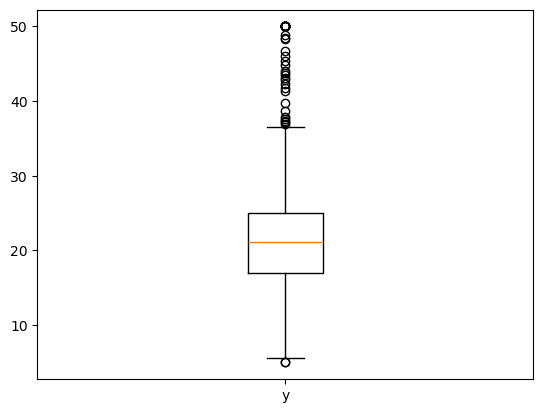

In [83]:
plt.boxplot(y, labels=('y'))             # 응답 변수 확인(데이터 모니터링)

In [84]:
linear_regression = linear_model.LinearRegression(fit_intercept=True)
linear_regression.fit(X, y)

LinearRegression()

In [85]:
# 진치 검사 >> SSE 표준화
SSE = np.linalg.norm(y - linear_regression.predict(X)) ** 2
RMSE = np.sqrt(SSE / (X.shape[0] - X.shape[1] -1))
standardized_residuals = (y - linear_regression.predict(X)) / RMSE

Text(0, 0.5, 'standardized residuals')

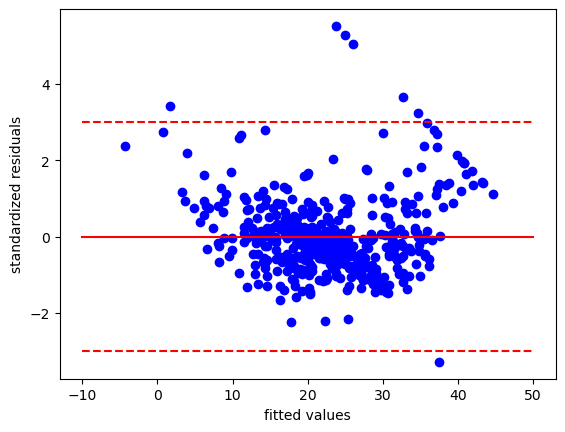

In [86]:
plt.plot(linear_regression.predict(X), standardized_residuals, 'bo')
plt.plot([-10, 50], [0, 0], "r-")
plt.plot([-10, 50], [3, 3], "r--")
plt.plot([-10, 50], [-3, -3], "r--")
plt.xlabel('fitted values')
plt.ylabel('standardized residuals')

In [87]:
# 예측변수 이상치 확인
standardization = StandardScaler(with_mean=True, with_std=True)
Xs = standardization.fit_transform(X)

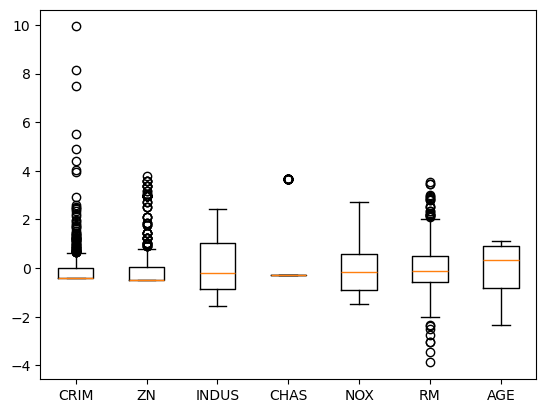

In [88]:
boxplot = plt.boxplot(Xs[:, 0:7], labels=labels[0:7])

In [89]:
# 주성분 분석 >> 데이터셋의 차원을 축소하는 기법, 표준화 이후 주성분을 추출하는 과정에서 이상치를 제거함
pca = PCA()
pca.fit(Xs)
C = pca.transform(Xs)
pca.explained_variance_ratio_   # 선택된 각 주성분이 설명하는 분산의 비율을 담고 있는 배열 >> 차원이 축소된 데이터에서 얼마나 많은 정보(분산)가 유지되는가 확인

array([0.4713 , 0.11025, 0.09559, 0.06597, 0.06422, 0.05057, 0.04118,
       0.03047, 0.0213 , 0.01694, 0.01431, 0.01302, 0.00489])

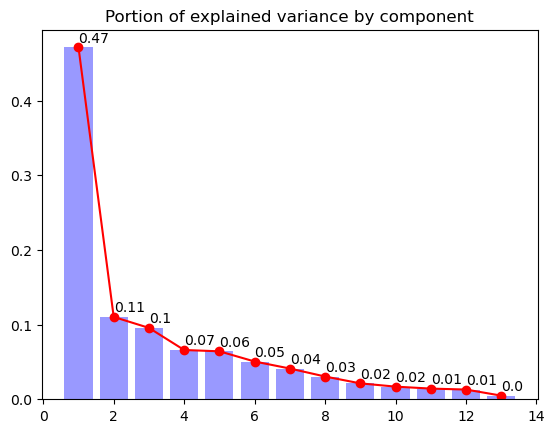

In [90]:
# PCA의 설명된 분산 비율 시각화 >> 해당 주성분이 데이터의 전체 분산에서 차지하는 비율을 직관적으로 이해

explained_variance = pca.explained_variance_ratio_              # pca 모델에서 각 주성분이 설명하는 분산 비율
plt.title('Portion of explained variance by component')         
range_ = [r + 1 for r in range(len(explained_variance))]        # 주성분의 인덱스를 1부터 지정
plt.bar(range_, explained_variance, color="b", alpha=0.4, align="center")      # 각 주성분의 분산 비율을 막대그래프로 시각화
plt.plot(range_, explained_variance, 'ro-')
for pos, pct in enumerate(explained_variance):
    plt.annotate(str(round(pct, 2)), (pos + 1, pct + 0.007))

Text(0, 0.5, 'Dimension 2')

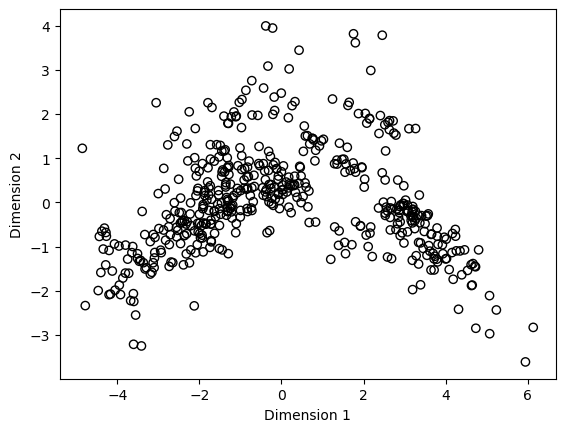

In [91]:
# PCA를 통해 차원 축소된 데이터의 2차원 산점도 시각화 >> 2번째 주성분(차원)에 대해 1번째 주성분(차원) 플롯
scatter = plt.scatter(C[:, 0], C[:, 1], facecolors='none', edgecolors='black')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

Text(0, 0.5, 'Dimension 3')

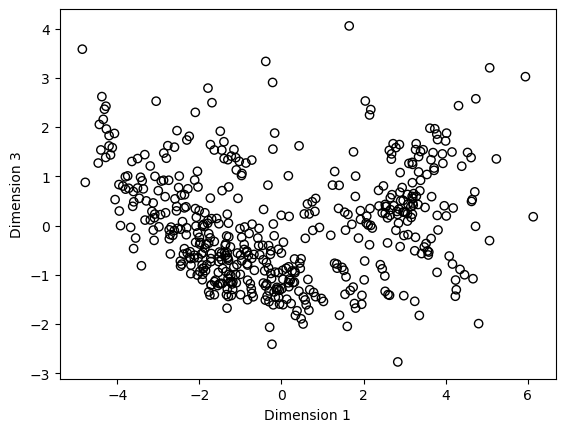

In [92]:
# PCA를 통해 차원 축소된 데이터의 2차원 산점도 시각화 >> 3번째 주성분(차원)에 대해 1번째 주성분(차원) 플롯
scatter = plt.scatter(C[:, 0], C[:, 2], facecolors='none', edgecolors='black')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 3')